<a href="https://colab.research.google.com/github/JanKotynia/Python_World_Population_Analysis/blob/main/WorldPopulationAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import kagglehub

path = kagglehub.dataset_download("iamsouravbanerjee/world-population-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'world-population-dataset' dataset.
Path to dataset files: /kaggle/input/world-population-dataset


In [148]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

print(os.listdir(path))
file_path = os.path.join(path, "world_population.csv")
df = pd.read_csv(file_path, encoding="utf-8")

df.head()

['world_population.csv']


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [149]:
df.sort_values('Rank',inplace=True)
df.set_index('Rank')

,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,,,,,,,,,,,,,,,,
1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 41 to 226
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)              

In [151]:
df.groupby('Continent')['2022 Population'].sum()

,2022 Population
Continent,
Africa,1426730932
Asia,4721383274
Europe,743147538
North America,600296136
Oceania,45038554
South America,436816608


In [152]:
cont_pop = df.groupby('Continent')['2022 Population'].sum()

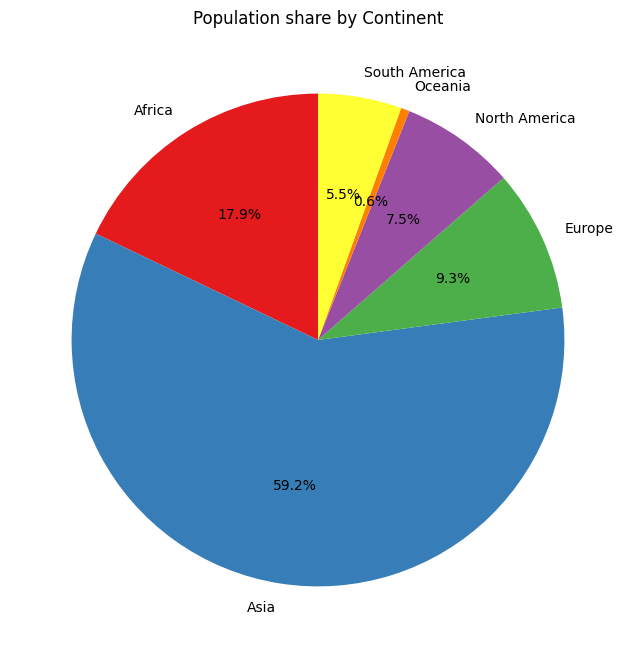

In [164]:
plt.figure(figsize=(8, 8))
plt.pie(
    cont_pop,
    labels=cont_pop.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set1.colors
)
plt.title("Population share by Continent")
plt.show()

In [154]:
cont_pop_chg = df.iloc[:,4:13].groupby('Continent').sum().pivot_table(columns='Continent')

cont_pop_chg.reset_index(inplace=True)

cont_pop_chg.rename(columns={'index': 'Year'}, inplace=True)

cont_pop_chg['Year'] = cont_pop_chg['Year'].apply(lambda x : x.split()[0])

cont_pop_chg = cont_pop_chg.melt(id_vars='Year', var_name='Continent', value_name='population').set_index('Year')

In [155]:
cont_pop_chg

,Continent,population
Year,,
1970,Africa,3.654443e+08
1980,Africa,4.815364e+08
1990,Africa,6.381506e+08
2000,Africa,8.189460e+08
2010,Africa,1.055228e+09
2015,Africa,1.201102e+09
2020,Africa,1.360672e+09
2022,Africa,1.426731e+09
1970,Asia,2.144906e+09


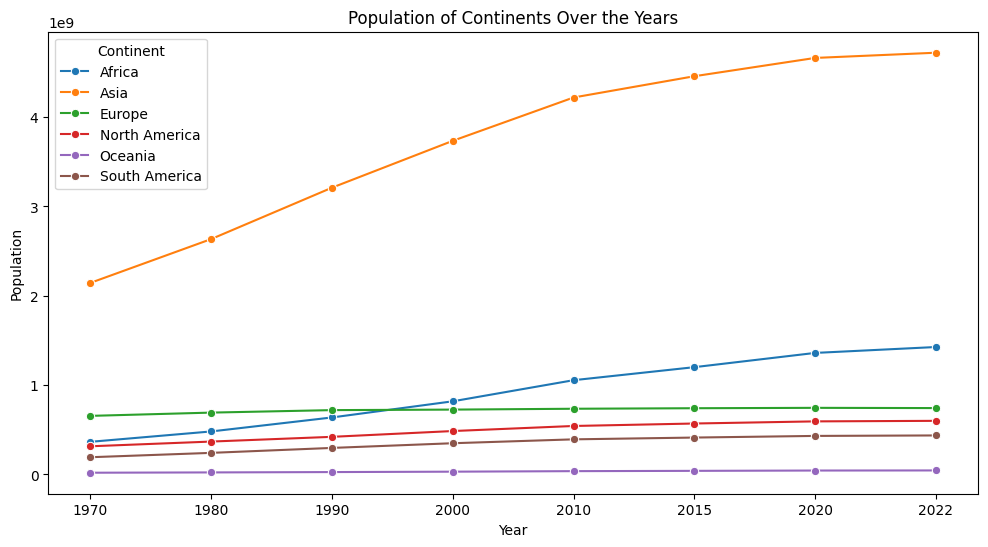

In [163]:
plt.figure(figsize=(12,6))
sns.lineplot(data=cont_pop_chg, x='Year', y='population', hue='Continent', marker="o")
plt.title("Population of Continents Over the Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

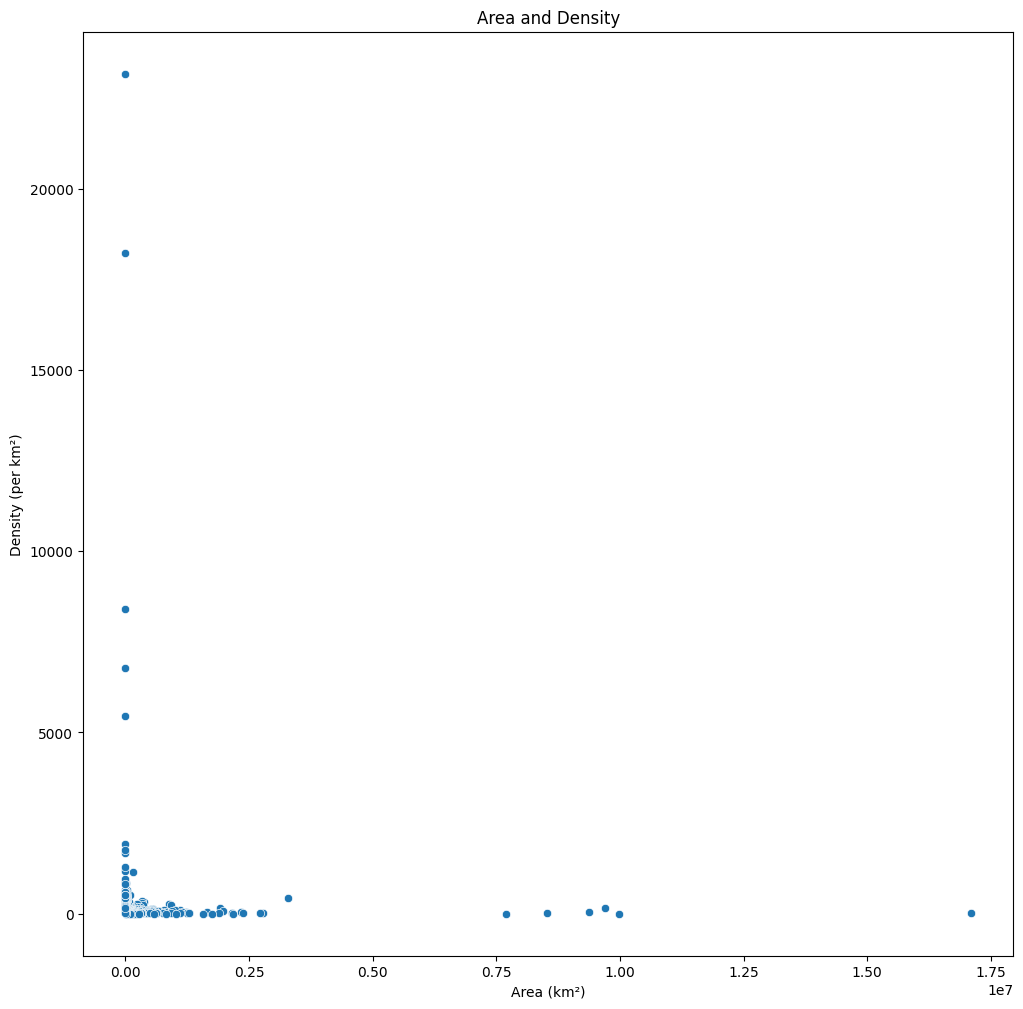

In [162]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df, x='Area (km²)', y='Density (per km²)')
plt.title("Area and Density")
plt.show()